<a href="https://colab.research.google.com/github/XVPB511/Mobile_guidanceCNN/blob/main/MobileNet_Guidance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning example using Keras and Mobilenet#
In this notebook I shall show you an example of using Mobilenet to classify images of dogs. I will then show you an example when it subtly misclassifies a bluetit. I will then retrain Mobilenet and employ transfer learning such that it can correctly classify the same input image.  Only two classifiers are employed. But this can be extended to as many as you want, limited to the amount of hardware and time you have available.

Lets load the necessary packages and libraries

In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install keras==2.15.0

  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.9.0
    Uninstalling keras-3.9.0:
      Successfully uninstalled keras-3.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires keras>=3.5.0, but you have keras 2.15.0 which is incompatible.


In [ ]:
import tensorflow as tf
import os
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from tensorflow import keras
import keras
from keras import backend as K
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
from tensorflow.keras.models import load_model

import seaborn as sns

from google.colab import files

ImportError: /usr/local/lib/python3.11/dist-packages/tensorflow/python/util/_pywrap_utils.so: undefined symbol: _ZN10tensorflow36IsDataTypeSupportedByOneDNNOnThisCPUERKNS_8DataTypeE

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load dataset
# Complete path to storage location of the .zip file of data
zip_path = '/content/drive/MyDrive/project/dataset.zip'
# Check current directory (be sure you're in the directory where Colab operates: '/content')
os.getcwd()
# Copy the .zip file into the present directory
!cp '{zip_path}' .
# Unzip quietly
!unzip -q 'dataset.zip'
# View the unzipped contents in the virtual machine

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()

In [ ]:
img_height = 224
img_width = 224
batch_size = 32
epochs=50

class_names=["01_in", "01_out", "02_in", "02_out", "03_in", "03_out", "04_in", "04_out", "05_in", "05_out", "06_in", "06_out", "07_in", "07_out", "08_in", "08_out", "09_in", "09_out", "10_in", "10_out", "11_in", "11_out", "12_in", "12_out", "13_T", "13_in", "13_out", "14_T", "14_in", "14_out", "15_T", "15_in", "15_out", "16_in", "16_out", "17_in", "17_out", "18_in", "18_out", "19_in", "19_out", "20_in", "20_out", "21_in", "21_out", "22_in", "22_out", "OTHER"]

images_test_path = Path("/content/dataset_valid/Test")
images_path = Path("/content/dataset_valid/Train")

In [ ]:
train_ds = image_dataset_from_directory(
    images_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  # Change to 'categorical'
)

val_ds = image_dataset_from_directory(
    images_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  # Change to 'categorical'
)

test_ds = image_dataset_from_directory(
    images_test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  # Change to 'int' for integer labels
)

test_ds_pred = image_dataset_from_directory(
    images_test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    label_mode='int'  # Change to 'int' for integer labels
)

Found 3184 files belonging to 48 classes.
Using 2548 files for training.
Found 3184 files belonging to 48 classes.
Using 636 files for validation.
Found 1317 files belonging to 48 classes.
Found 1317 files belonging to 48 classes.


In [ ]:
class_train_names = train_ds.class_names
print(class_train_names)
print("Count of class:",len(class_train_names))

['01_in', '01_out', '02_in', '02_out', '03_in', '03_out', '04_in', '04_out', '05_in', '05_out', '06_in', '06_out', '07_in', '07_out', '08_in', '08_out', '09_in', '09_out', '10_in', '10_out', '11_in', '11_out', '12_in', '12_out', '13_T', '13_in', '13_out', '14_T', '14_in', '14_out', '15_T', '15_in', '15_out', '16_in', '16_out', '17_in', '17_out', '18_in', '18_out', '19_in', '19_out', '20_in', '20_out', '21_in', '21_out', '22_in', '22_out', 'OTHER']
Count of class: 48


In [ ]:
# Optimize data loading [optional]
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

layer

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(48,activation='softmax')(x)

<ipython-input-10-78c14ee31861>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model=MobileNet(weights='imagenet',include_top=False)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

Lets check the model architecture

In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_layer_2
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 con

We will use pre-trained weights as the model has been trained already on the Imagenet dataset. We ensure all the weights are non-trainable. We will only train the last few dense layers.

In [ ]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

Now lets load the training data into the ImageDataGenerator. Specify path, and it automatically sends the data for training in batches, simplifying the code.

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(images_path,
                                                               labels='inferred',
                                                               label_mode='categorical',
                                                               batch_size=32 ,
                                                               class_names=["01_in", "01_out", "02_in", "02_out", "03_in", "03_out", "04_in", "04_out", "05_in", "05_out", "06_in", "06_out", "07_in", "07_out", "08_in",
                                                                            "08_out", "09_in", "09_out", "10_in", "10_out", "11_in", "11_out", "12_in", "12_out", "13_T", "13_in", "13_out", "14_T", "14_in", "14_out",
                                                                            "15_T", "15_in", "15_out", "16_in", "16_out", "17_in", "17_out", "18_in", "18_out", "19_in", "19_out", "20_in", "20_out", "21_in", "21_out",
                                                                            "22_in", "22_out", "OTHER"],
                                                               image_size=(224, 224))
class_train_names = train_ds.class_names
train_ds = train_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


Found 3184 files belonging to 48 classes.


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

# step_size_train=keras_ds.n//keras_ds.batch_size
model.fit(train_ds, batch_size=32, validation_data=val_ds, epochs=50)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 219ms/step - accuracy: 0.3151 - loss: 2.6015 - val_accuracy: 0.2170 - val_loss: 3.2078
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.7021 - loss: 0.8403 - val_accuracy: 0.4858 - val_loss: 1.7352
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7956 - loss: 0.5977 - val_accuracy: 0.6447 - val_loss: 1.0864
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.8641 - loss: 0.4148 - val_accuracy: 0.7563 - val_loss: 0.9062
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8835 - loss: 0.3445 - val_accuracy: 0.6494 - val_loss: 1.3653
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.8742 - loss: 0.3853 - val_accuracy: 0.8097 - val_loss: 0.6475
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9086 - loss: 0.2685 - val_accuracy: 0.8318 - val_loss: 0.5671
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9436 - loss: 0.1772 - va

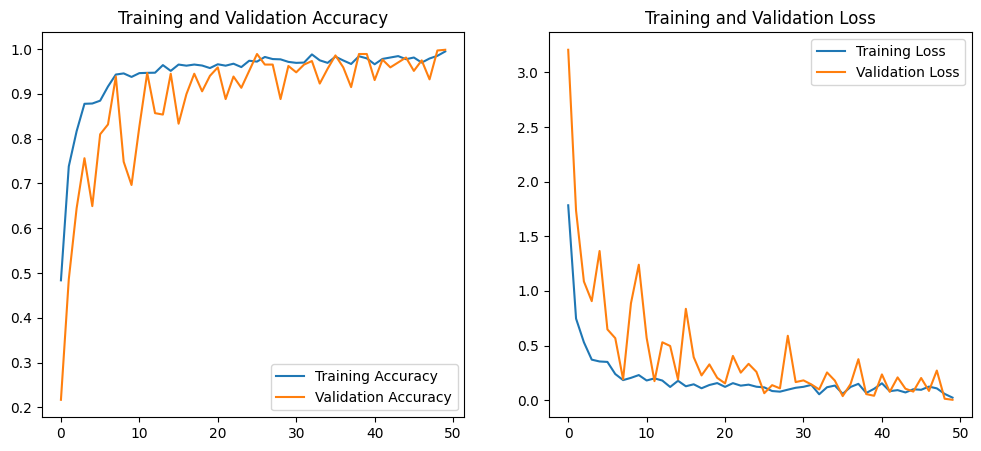

In [ ]:
# @title Show results
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Validate_CM

In [ ]:
# Evaluate the model on the test set
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc:.2f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9946 - loss: 0.0071
Validation Accuracy: 1.00


In [ ]:
# Generate classification report
y_max = [np.argmax(y, axis=1) for x, y in val_ds]
y_true_val = np.concatenate([np.argmax(y, axis=1) for x, y in val_ds], axis=0)
y_pred_probs_val = model.predict(val_ds)
y_pred_val = np.argmax(y_pred_probs_val, axis=1)

print(classification_report(y_true_val, y_pred_val, target_names=class_names))

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step
              precision    recall  f1-score   support

       01_in       1.00      1.00      1.00        15
      01_out       1.00      1.00      1.00        13
       02_in       1.00      1.00      1.00         7
      02_out       1.00      1.00      1.00        11
       03_in       0.94      1.00      0.97        16
      03_out       1.00      1.00      1.00         9
       04_in       1.00      0.94      0.97        16
      04_out       1.00      1.00      1.00        14
       05_in       1.00      1.00      1.00        13
      05_out       1.00      1.00      1.00        13
       06_in       1.00      1.00      1.00        16
      06_out       1.00      1.00      1.00        13
       07_in       1.00      1.00      1.00        11
      07_out       1.00      1.00      1.00        18
       08_in       1.00      1.00      1.00        13
      08_out       1.00      1.00      1.00         8
       09_in       1.00      1.00      1

[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0 

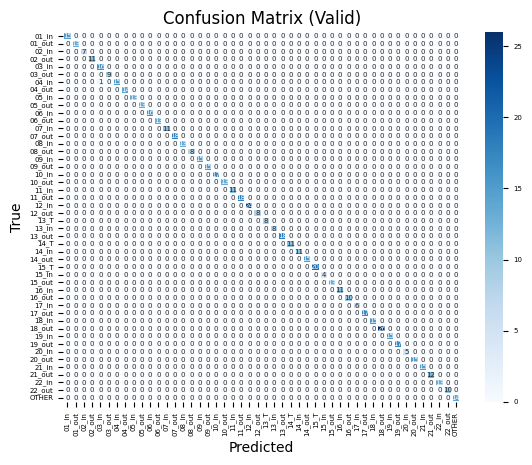

<Figure size 2000x2000 with 0 Axes>

In [ ]:
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
cm_val = confusion_matrix(y_true_val, y_pred_val)

np.set_printoptions(threshold=np.inf)
print(cm_val)

sns.heatmap(cm_val, cmap='Blues', annot=True, annot_kws={"size": 5}, xticklabels=class_names, yticklabels=class_names, linewidth=0.1)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Valid)')
plt.figure(figsize=(20,20))
plt.show()


#Test_CM

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - accuracy: 0.9012 - loss: 0.5282
Test Accuracy: 0.90


In [ ]:
# Generate classification report
y_true_test = np.concatenate([np.argmax(y, axis=1) for x, y in test_ds], axis=0)
y_pred_probs_test = model.predict(test_ds)
y_pred_test = np.argmax(y_pred_probs_test, axis=1)

print(classification_report(y_true_test, y_pred_test, target_names=class_names))

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step
              precision    recall  f1-score   support

       01_in       0.93      0.93      0.93        28
      01_out       0.95      0.95      0.95        22
       02_in       0.86      0.82      0.84        22
      02_out       0.88      0.88      0.88        25
       03_in       0.75      0.96      0.84        28
      03_out       0.73      0.67      0.70        24
       04_in       0.96      0.77      0.85        30
      04_out       0.83      0.83      0.83        30
       05_in       0.93      0.93      0.93        27
      05_out       0.96      0.96      0.96        28
       06_in       0.83      0.80      0.81        30
      06_out       0.90      0.87      0.88        30
       07_in       0.88      0.77      0.82        30
      07_out       0.77      0.83      0.80        29
       08_in       0.85      1.00      0.92        29
      08_out       0.75      0.62      0.68        29
       09_in       0.96      0.86      0.

[[26  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 18  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 22  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0 16  0  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0 

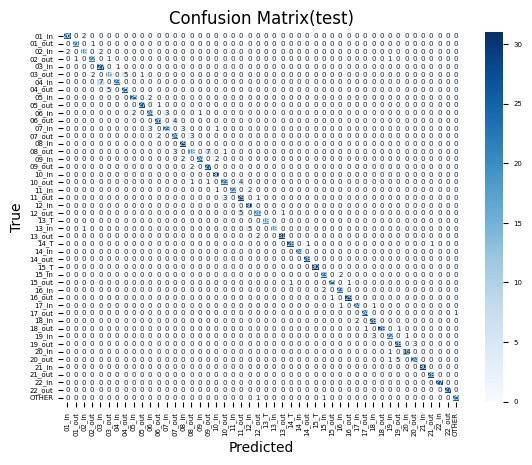

<Figure size 2000x2000 with 0 Axes>

In [ ]:
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
cm_test = confusion_matrix(y_true_test, y_pred_test)

np.set_printoptions(threshold=np.inf)
print(cm_test)

sns.heatmap(cm_test, cmap='Blues', annot=True, annot_kws={"size": 5}, xticklabels=class_names, yticklabels=class_names, linewidth=0.1)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix(test)')
plt.figure(figsize=(20,20))
plt.show()


Model is now trained. Now lets test some independent input images to check the predictions.

#Prediction

In [ ]:

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    score = model.predict(img_tensor)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    display(Image(filename=img_path))
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_train_names[np.argmax(score)], 100 * np.max(score))
    )

    print(score)

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


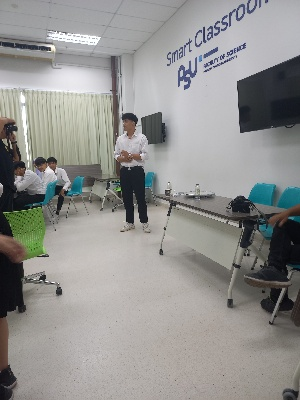

This image most likely belongs to OTHER with a 100.00 percent confidence.
[[1.0553959e-07 1.5792180e-06 1.6072013e-10 1.0905741e-09 6.9168284e-14
  2.3168232e-12 7.0373343e-12 3.4154654e-12 1.1098342e-15 3.6254261e-12
  3.0552599e-10 4.2094676e-16 2.5156904e-11 8.2607532e-15 5.6707444e-10
  9.3064454e-09 1.3023298e-12 5.3032309e-12 1.3828390e-09 4.8580957e-09
  5.8534655e-10 4.7016293e-12 2.0485387e-09 1.3199659e-11 5.3812892e-09
  3.5216684e-11 8.1199495e-13 1.5423153e-09 4.5374845e-13 2.4414038e-11
  7.2785588e-07 2.7083151e-12 1.3272216e-11 4.1942968e-12 2.1599003e-15
  2.9426782e-14 3.8623276e-14 8.7719538e-14 2.5721328e-11 3.1149208e-09
  4.6673772e-14 6.7076189e-07 3.0135111e-12 1.8539476e-09 1.6672708e-10
  7.5183983e-09 1.3933975e-09 9.9999690e-01]]


In [ ]:
img_path = '/content/dataset_valid/Test/OTHER/20230706_163759.jpg'
new_image = load_image(img_path)

#**TEST**

In [ ]:
test_dir = '/content/dataset_valid/Test'

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# สร้าง generator สำหรับข้อมูล Test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=1,  # ทำนายทีละภาพ
    class_mode='categorical',
    shuffle=False  # ไม่สลับลำดับข้อมูล
)

Found 1317 images belonging to 48 classes.


In [ ]:
# ทำนายผลทั้งหมด
predictions = model.predict(test_generator, steps=test_generator.samples)
predicted_classes = np.argmax(predictions, axis=1)
# ดึงชื่อคลาส
class_names = list(test_generator.class_indices.keys())

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1317/1317 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


In [ ]:
# คำนวณความแม่นยำโดยรวม
true_classes = test_generator.classes
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Overall Accuracy: {overall_accuracy}")

Overall Accuracy: 0.18223234624145787


In [ ]:
# คำนวณความแม่นยำสำหรับแต่ละโฟลเดอร์ย่อย
for class_name in class_names:
    class_index = class_names.index(class_name)
    indices = np.where(true_classes == class_index)[0]
    class_predictions = predicted_classes[indices]
    class_true_values = true_classes[indices]
    class_accuracy = accuracy_score(class_true_values, class_predictions)
    print(f"Accuracy for {class_name}: {class_accuracy}")

Accuracy for 01_in: 0.7857142857142857
Accuracy for 01_out: 0.22727272727272727
Accuracy for 02_in: 0.045454545454545456
Accuracy for 02_out: 0.0
Accuracy for 03_in: 0.0
Accuracy for 03_out: 0.0
Accuracy for 04_in: 0.03333333333333333
Accuracy for 04_out: 0.0
Accuracy for 05_in: 0.0
Accuracy for 05_out: 0.7857142857142857
Accuracy for 06_in: 0.2
Accuracy for 06_out: 0.0
Accuracy for 07_in: 0.06666666666666667
Accuracy for 07_out: 0.2413793103448276
Accuracy for 08_in: 0.0
Accuracy for 08_out: 0.06896551724137931
Accuracy for 09_in: 0.0
Accuracy for 09_out: 0.0
Accuracy for 10_in: 0.0
Accuracy for 10_out: 0.0
Accuracy for 11_in: 0.0
Accuracy for 11_out: 0.0
Accuracy for 12_in: 0.23333333333333334
Accuracy for 12_out: 0.0
Accuracy for 13_T: 0.0
Accuracy for 13_in: 0.0
Accuracy for 13_out: 0.0
Accuracy for 14_T: 0.13333333333333333
Accuracy for 14_in: 0.5
Accuracy for 14_out: 0.0
Accuracy for 15_T: 0.06666666666666667
Accuracy for 15_in: 0.52
Accuracy for 15_out: 0.037037037037037035
Accu